In [174]:
import sklearn as sl
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
import seaborn as sns
import math
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [17]:
titanic = pd.read_csv("train.csv")

In [18]:
#Part 1

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
titanic.dtypes

PassengerId       int64
Survived       category
Pclass         category
Sex            category
Age             float64
Fare            float64
Embarked       category
male              uint8
Q                 uint8
S                 uint8
Family            int64
dtype: object

In [21]:
titanic["Survived"] = titanic["Survived"].astype('category')

In [22]:
titanic["Survived"] = titanic["Survived"].cat.rename_categories([0, 1])

In [23]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
titanic["Embarked"] = titanic.Embarked.fillna("S")

In [ ]:
#dummification approach is taken from: https://towardsdatascience.com/logistic-regression-a-simplified-approach-using-python-c4bc81a87c31

In [26]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embarked = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [27]:
titanic["Sex"] = titanic["Sex"].astype('category')

titanic["Pclass"] = titanic["Pclass"].astype('category')
titanic["Pclass"] = titanic["Pclass"].cat.rename_categories([1, 2, 3])
titanic["Embarked"] = titanic["Embarked"].astype('category')



In [28]:
titanic = pd.concat([titanic,sex,embarked],axis=1)

In [29]:
titanic = titanic.drop(columns=["Name", "Ticket", "Cabin"])

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [ ]:
#Part 2

In [31]:
titanic["Family"] = titanic["Parch"] + titanic["SibSp"]

In [32]:
titanic = titanic.drop(columns=["Parch", "SibSp"])

In [33]:
impute_train = titanic[titanic.Age.notnull()]
impute_predict = titanic[titanic.Age.isnull()]
X_train = impute_train[['Pclass','male', 'Fare', 'Q', 'S', 'Family']]
y_train = impute_train[['Age']]
X_test = impute_predict[['Pclass','male', 'Fare', 'Q', 'S', 'Family']]


In [34]:
impute_regmodel = LinearRegression()  
impute_regmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_test = impute_regmodel.predict(X_test)


In [36]:
y_test = pd.DataFrame(y_test)
y_test = y_test[0]

In [37]:
#python is not my first language, so I am writing this rather ugly NaN fill function rather than thinking of something more elegant.
y = 0
new = titanic["Age"]
for i in range(len(titanic['Age'])):
    if titanic['Age'].isnull()[i]:
        new[i] = y_test[y]
        y += 1
    else:
        pass
titanic['Age'] = new

D:\Conda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
titanic['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      30.684694
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     35.339764
18     31.000000
19     23.154222
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     25.920115
27     19.000000
28     27.925943
29     28.206731
         ...    
861    21.000000
862    48.000000
863    -0.091397
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    28.186948
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    28.206731
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    17.8174

In [ ]:
#Part 3

In [42]:
titanic.describe(include = ['object', 'float', 'int', 'category'])

,Survived,Pclass,Sex,Age,Fare,Embarked
count,891.0,891.0,891,891.000000,891.000000,891
unique,2.0,3.0,2,NaN,NaN,3
top,0.0,3.0,male,NaN,NaN,S
freq,549.0,491.0,577,NaN,NaN,646
mean,NaN,NaN,NaN,29.448391,32.204208,NaN
std,NaN,NaN,NaN,13.499978,49.693429,NaN
min,NaN,NaN,NaN,-0.091397,0.000000,NaN
25%,NaN,NaN,NaN,21.000000,7.910400,NaN
50%,NaN,NaN,NaN,28.204829,14.454200,NaN
75%,NaN,NaN,NaN,36.000000,31.000000,NaN


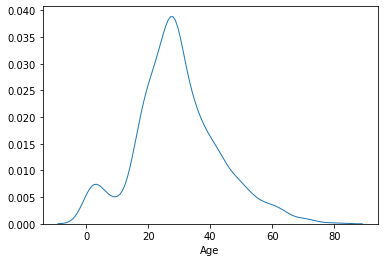

In [43]:
sns.distplot(titanic['Age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1})

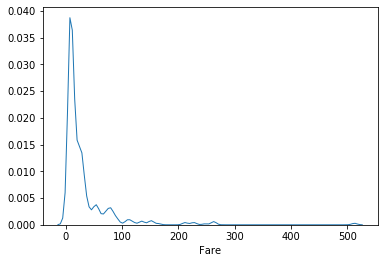

In [44]:
sns.distplot(titanic['Fare'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1})


In [45]:
def my_log(input):
    if input == 0:
        return(input)
    else:
        return(math.log(input))

In [46]:
titanic["Fare"] = titanic['Fare'].apply(my_log)

In [47]:
titanic = titanic.rename(columns={"Fare": "logFare"})

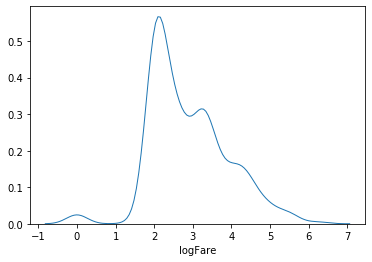

In [48]:
sns.distplot(titanic['logFare'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1})

In [49]:
table_cat = titanic.loc[ :,['Survived', "Sex", "Pclass"]]

In [50]:
table_cat["Survived"] = table_cat["Survived"].cat.rename_categories(["no", "yes"])

In [51]:
table_cat["Sex"] = table_cat["Sex"].cat.rename_categories(["female", "male"])


In [52]:
table_cat = pd.crosstab(index=[table_cat["Sex"],
                                      table_cat["Survived"]], 
                          columns= table_cat["Pclass"])

In [53]:
table_cat

Pclass            1   2    3
Sex    Survived             
female no         3   6   72
       yes       91  70   72
male   no        77  91  300
       yes       45  17   47

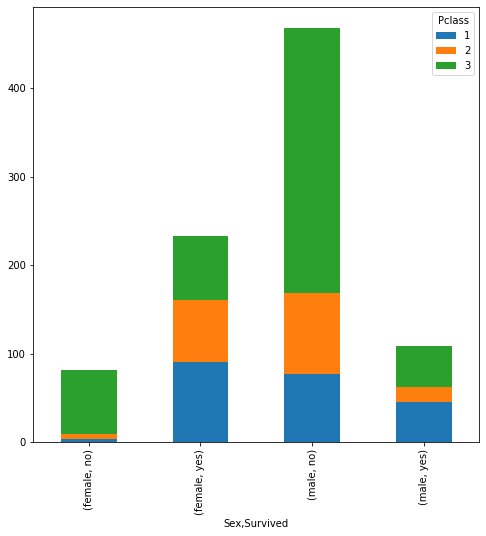

In [54]:
table_cat.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)



In [55]:
stats.chi2_contingency(pd.crosstab(
    index=titanic["Sex"], 
           columns = titanic["Survived"]))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

In [56]:
stats.chi2_contingency(pd.crosstab(
    index=titanic["Pclass"], 
           columns = titanic["Survived"]))

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

In [57]:
stats.chi2_contingency(pd.crosstab(
    index=titanic["Embarked"], 
           columns = titanic["Survived"]))

(25.964452881874784,
 2.3008626481449577e-06,
 2,
 array([[103.51515152,  64.48484848],
        [ 47.44444444,  29.55555556],
        [398.04040404, 247.95959596]]))

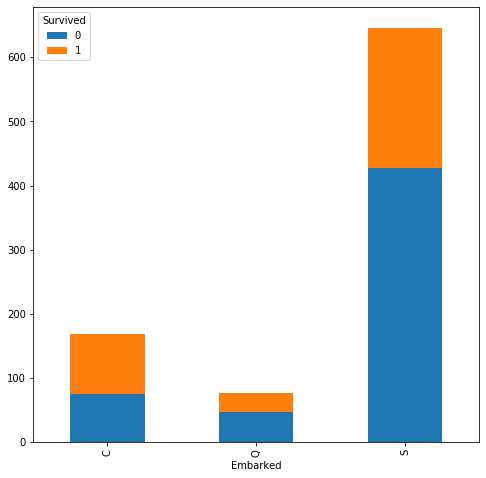

In [58]:
pd.crosstab(
    index=titanic["Embarked"], 
           columns = titanic["Survived"]).plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [60]:
pd.crosstab(
    index=titanic["Embarked"], 
           columns = titanic["Pclass"])

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,129,164,353


In [61]:
table_cont = titanic.loc[ :,['Survived','Age', "logFare", "Family"]]

In [62]:
table_cont.groupby("Survived").describe()

Age                                                              \
          count       mean        std       min        25%        50%   75%   
Survived                                                                      
0         549.0  30.008066  13.173145 -0.091397  22.000000  28.204829  37.0   
1         342.0  28.549966  13.981403  0.420000  20.900114  27.927716  36.0   

               logFare            ...                     Family            \
           max   count      mean  ...       75%       max  count      mean   
Survived                          ...                                        
0         74.0   549.0  2.631350  ...  3.258097  5.572154  549.0  0.883424   
1         80.0   342.0  3.315222  ...  4.043051  6.238967  342.0  0.938596   

                                              
               std  min  25%  50%  75%   max  
Survived                                      
0         1.830669  0.0  0.0  0.0  1.0  10.0  
1         1.186076  0.0  0.0  1.0  2.0   6.0  

[2 rows x 24 columns]

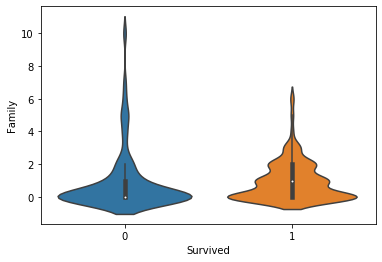

In [63]:
sns.violinplot(table_cont['Survived'], table_cont['Family'])

In [64]:
titanic["Family"] = [i  if i == 0  else 1 for i in titanic["Family"]]


In [65]:
titanic["Family"] = titanic["Family"].astype('category')

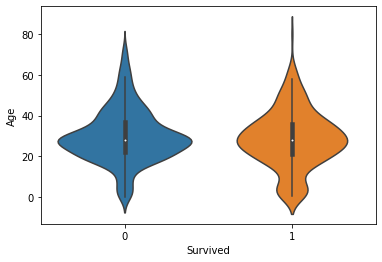

In [66]:
sns.violinplot(table_cont['Survived'], table_cont['Age'])

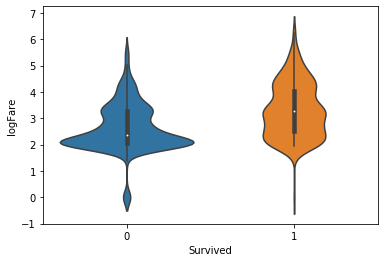

In [67]:
sns.violinplot(table_cont['Survived'], table_cont['logFare'])

In [ ]:
#Part 4

In [68]:
from patsy import dmatrices

In [101]:
y, X = dmatrices('Survived ~ Age + Family + S + Q + C(male)*C(Pclass)', titanic, return_type="dataframe")

In [102]:
X.head()

,Intercept,Family[T.1],C(male)[T.1],C(Pclass)[T.2],C(Pclass)[T.3],C(male)[T.1]:C(Pclass)[T.2],C(male)[T.1]:C(Pclass)[T.3],Age,S,Q
0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,22.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,26.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,35.0,1.0,0.0


In [103]:
y = y['Survived[1]']

In [108]:
model_pclass = LogisticRegression()
model_pclass.fit(X, y)

D:\Conda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
print(model_pclass.coef_)
print(model_pclass.intercept_)


[[ 1.75966119  0.01972344 -2.53339703  0.01800727 -2.53672889 -1.33646119
   0.73935712 -0.02826187 -0.49321332  0.096648  ]]
[1.75966119]


In [ ]:
#Gaussian Naive Bayes model

In [166]:
y, X = dmatrices('Survived ~ Age + Family + S + Q + C(male)*C(Pclass)', titanic, return_type="dataframe")
y = y['Survived[1]']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 100, train_size = 791)

In [168]:
model_nb = GaussianNB()

In [169]:
model_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [170]:
nb_predicted = model_nb.predict(X_test)

In [171]:
print(classification_report(y_test, nb_predicted))

              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79        61
         1.0       0.67      0.72      0.69        39

    accuracy                           0.75       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.75      0.75      0.75       100



In [172]:
print(confusion_matrix(y_test, nb_predicted))

[[47 14]
 [11 28]]


In [165]:
#tree-based algorithm

array([[3.32402364e-02, 9.66759764e-01],
       [9.97369353e-01, 2.63064675e-03],
       [2.00428576e-02, 9.79957142e-01],
       [1.04883079e-01, 8.95116921e-01],
       [3.09742325e-03, 9.96902577e-01],
       [9.97140104e-01, 2.85989628e-03],
       [9.95799152e-01, 4.20084803e-03],
       [6.95413205e-03, 9.93045868e-01],
       [5.75737165e-02, 9.42426283e-01],
       [2.77845718e-02, 9.72215428e-01],
       [9.97282828e-01, 2.71717223e-03],
       [2.61728880e-01, 7.38271120e-01],
       [4.08817176e-01, 5.91182824e-01],
       [9.99058875e-01, 9.41124612e-04],
       [1.07384074e-01, 8.92615926e-01],
       [5.84706951e-01, 4.15293049e-01],
       [9.77344358e-01, 2.26556420e-02],
       [9.88625086e-01, 1.13749143e-02],
       [9.97467495e-01, 2.53250505e-03],
       [5.73712400e-03, 9.94262876e-01],
       [9.97431006e-01, 2.56899426e-03],
       [9.71146399e-01, 2.88536014e-02],
       [6.44576840e-03, 9.93554232e-01],
       [9.94894174e-01, 5.10582552e-03],
       [2.605371

In [176]:
y, X = dmatrices('Survived ~ Age + Family + S + Q + C(male)*C(Pclass) + logFare', titanic, return_type="dataframe")
y = y['Survived[1]']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 100, train_size = 791)
model_tree = DecisionTreeClassifier(random_state=0, max_depth=10)

In [178]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [179]:
tree_predicted = model_tree.predict(X_test)

In [181]:
print(classification_report(y_test, tree_predicted))
print(confusion_matrix(y_test, tree_predicted))

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85        61
         1.0       0.76      0.74      0.75        39

    accuracy                           0.81       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.81      0.81      0.81       100

[[52  9]
 [10 29]]
